# Loading up the MNIST dataset


In [1]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

## Peeking at the MNIST training data

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
img0 = training_data[0][0].reshape(28,28)

def peekimg(img):
    plt.imshow(1-img, cmap = cm.Greys_r)

def testshow(index):
    im = test_data[index][0]
    peekimg(im.reshape(28,28))
    return im

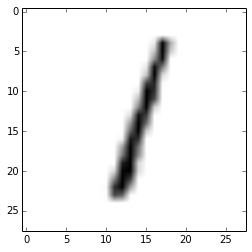

In [3]:
im4 = testshow(4)
im7 = testshow(0)
im2 = testshow(1)
im1 = testshow(2)

# Loading the neural network code

Initialize it so input layer is $28x28 = 784$, 30 hidden neurons and 10 output neurons, to represent the ten digits it will be trained to recognize.

In [4]:
import network
net = network.Network([784, 30, 10])

In [5]:
net.load_from_pickled_parameters()

# Use stochastic gradient descent to train the network

Using learning rate $\eta = 3$, over 30 epochs.

In [52]:
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Epoch 0: 9067 / 10000
Epoch 1: 9186 / 10000
Epoch 2: 9262 / 10000
Epoch 3: 9317 / 10000
Epoch 4: 9346 / 10000
Epoch 5: 9386 / 10000
Epoch 6: 9407 / 10000
Epoch 7: 9399 / 10000
Epoch 8: 9302 / 10000
Epoch 9: 9403 / 10000
Epoch 10: 9447 / 10000
Epoch 11: 9433 / 10000
Epoch 12: 9478 / 10000
Epoch 13: 9469 / 10000
Epoch 14: 9430 / 10000
Epoch 15: 9461 / 10000
Epoch 16: 9460 / 10000
Epoch 17: 9489 / 10000
Epoch 18: 9446 / 10000
Epoch 19: 9475 / 10000
Epoch 20: 9458 / 10000
Epoch 21: 9474 / 10000
Epoch 22: 9477 / 10000
Epoch 23: 9458 / 10000
Epoch 24: 9462 / 10000
Epoch 25: 9465 / 10000
Epoch 26: 9483 / 10000
Epoch 27: 9464 / 10000
Epoch 28: 9458 / 10000
Epoch 29: 9488 / 10000


In [6]:
def recognize(im):
    output = net.feedforward(im).reshape(1,10)
    return np.argmax(output)

In [7]:
recognize(im7)

7

In [8]:
def showoff(index):
    peekimg(test_data[index][0].reshape(28,28))
    print recognize(test_data[index][0])

0


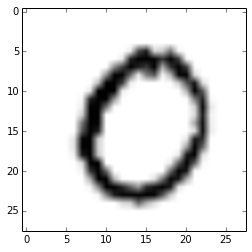

In [12]:
showoff(101)

In [26]:
from PIL import Image
import matplotlib.image as mpimg

In [44]:
im6 = Image.open("/Users/tlehman/Desktop/6.png").convert('LA')
im6.thumbnail((28,28))
np.array(im6.getdata())

array([[255, 255],
       [255, 255],
       [255, 255],
       ..., 
       [255, 255],
       [255, 255],
       [255, 255]])

8


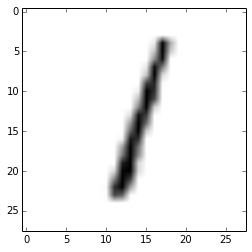

In [51]:
showoff(2)

In [118]:
np.save('../data/weights', net.weights)
np.save('../data/biases', net.biases)